# Set up

In [2]:
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [4]:
train_path = 'towels/train/'
valid_path = 'towels/validate/'
test_path = 'towels/test/'

In [5]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['True', 'False'], batch_size=10) 
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['True', 'False'], batch_size=4) 
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['True', 'False'], batch_size=28) 

Found 239 images belonging to 2 classes.
Found 47 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


In [6]:
imgs, labels = next(train_batches)

In [7]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

# Build and train CNN

# Predict

# Build Fine-tuned VGG16 model

In [96]:
vgg16_model = keras.applications.vgg16.VGG16()

In [97]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [98]:
type(vgg16_model)

keras.engine.training.Model

In [99]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [100]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [101]:
for layer in model.layers:
    layer.trainable = False

In [102]:
model.add(Dense(2, activation='softmax'))

In [103]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

# Train the fine-tuned VGG16 model

In [104]:
model.compile(Adam(lr=.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [105]:
model.fit_generator(train_batches, steps_per_epoch=24,
                   validation_data=valid_batches, validation_steps=12, epochs=50, verbose=2, use_multiprocessing=True)

Epoch 1/50
 - 2s - loss: 0.6330 - acc: 0.6764 - val_loss: 0.2727 - val_acc: 0.8723
Epoch 2/50
 - 2s - loss: 0.4504 - acc: 0.7907 - val_loss: 0.2565 - val_acc: 0.9149
Epoch 3/50
 - 2s - loss: 0.3541 - acc: 0.8533 - val_loss: 0.1607 - val_acc: 0.9787
Epoch 4/50
 - 2s - loss: 0.2724 - acc: 0.8783 - val_loss: 0.1795 - val_acc: 0.9787
Epoch 5/50
 - 2s - loss: 0.2092 - acc: 0.9292 - val_loss: 0.2301 - val_acc: 0.9149
Epoch 6/50
 - 2s - loss: 0.2080 - acc: 0.9208 - val_loss: 0.1855 - val_acc: 0.9574
Epoch 7/50
 - 2s - loss: 0.1710 - acc: 0.9292 - val_loss: 0.1859 - val_acc: 0.9574
Epoch 8/50
 - 2s - loss: 0.1657 - acc: 0.9458 - val_loss: 0.1634 - val_acc: 0.9787
Epoch 9/50
 - 2s - loss: 0.1300 - acc: 0.9500 - val_loss: 0.2078 - val_acc: 0.9362
Epoch 10/50
 - 2s - loss: 0.1445 - acc: 0.9500 - val_loss: 0.1632 - val_acc: 0.9574
Epoch 11/50
 - 2s - loss: 0.1151 - acc: 0.9708 - val_loss: 0.1899 - val_acc: 0.9574
Epoch 12/50
 - 2s - loss: 0.1255 - acc: 0.9583 - val_loss: 0.1925 - val_acc: 0.9787
E

# Predict using fine-tuned VGG16 model

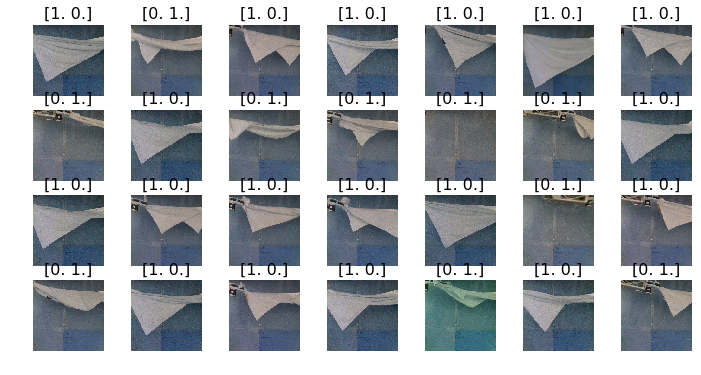

In [106]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels, rows=4)

In [107]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.], dtype=float32)

In [108]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [109]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

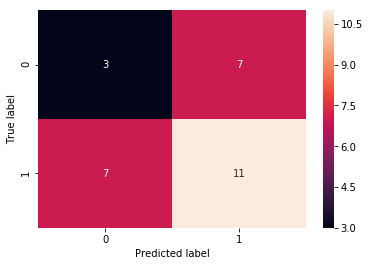

In [110]:
ax = plt.axes()
sns.heatmap(cm,annot=True,fmt='.5g', ax = ax) 
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()